In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('/content/drive/MyDrive/ThefilteredFinal.csv')

In [ ]:
df[" Label"].value_counts()
# del df

4     405787
2     398538
7     285762
1     199764
5     198373
3     180578
8      60877
9      47994
10     46412
11      8618
0       7412
12      4638
6       1242
Name:  Label, dtype: int64

In [ ]:
# df_experiment.Label.value_counts()
# del df
df.drop([" Source IP", " Destination IP"], axis=1, inplace=True)

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.drop("Flow ID", axis=1, inplace=True)

In [ ]:
df.drop(" Timestamp", axis=1, inplace=True)

In [ ]:
df.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Min',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Min', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', ' Bwd Packets/s', 'FIN Flag Count',
       ' SYN Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', 'Active Mean', ' Active Std', ' Idle Std',
       ' NFlow Packets/s',

In [ ]:
df = df[[' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Min',
       'Bwd Packet Length Max', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Min',
       ' Fwd Header Length', ' Bwd Header Length', ' Bwd Packets/s',
       ' Init_Win_bytes_backward', ' NFlow Packets/s'," Label"]]

In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Min,Bwd Packet Length Max,Flow IAT Mean,Flow IAT Std,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Min,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Init_Win_bytes_backward,NFlow Packets/s,Label
0,51400,47620,17,1,2,0,750.0,375.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,16,0,0.0,-1,1.199559e+00,2
1,40627,21702,17,1,2,0,802.0,401.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,16,0,0.0,-1,1.199559e+00,2
2,56021,48070,17,0,2,0,802.0,401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0,0.0,-1,1.601800e-15,2
3,40496,52869,17,1,2,0,766.0,383.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,40,0,0.0,-1,1.199559e+00,2
4,57036,31958,17,0,2,0,766.0,383.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0,0.0,-1,1.601800e-15,2


In [ ]:
# data split
from sklearn.model_selection import train_test_split
from collections import Counter
y = df[" Label"]
X = df.drop(columns=' Label')
labels = y.unique()

classes = y.nunique()
print(X.shape)
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("after spliting the data:\n")
print("training data length:", len(X_train))
print("test data length:", len(X_test))
# print(y_train.nunique())
# print(y_train.value_counts())

(1845995, 20)
number of labels: 13
instances per label
 4     405787
2     398538
7     285762
1     199764
5     198373
3     180578
8      60877
9      47994
10     46412
11      8618
0       7412
12      4638
6       1242
Name:  Label, dtype: int64
labels: [ 2  6  0  3  4  5  1  8  7 10 11 12  9]
after spliting the data:

training data length: 1384496
test data length: 461499


In [ ]:
y_train.unique()

array([10,  4,  8,  3,  7,  1,  5,  2,  9,  0,  6, 11, 12])

In [ ]:
### Set a copy for binary classification:
class_attack = [10,  4,  8,  3,  7,  5,  2,  9,  6, 11, 12]
bi_train_y = y_train.copy()
# bi_train_y.replace(class_attack, value='attack', inplace=True)
bi_train_y.replace(1, value='tftp', inplace=True)
bi_train_y.replace(2, value='udpssdp', inplace=True)
bi_train_y.replace(3, value='ldap', inplace=True)
bi_train_y.replace(4, value='syn', inplace=True)
bi_train_y.replace(5, value='mssql', inplace=True)
bi_train_y.replace(6, value='hulk', inplace=True)
bi_train_y.replace(7, value='rudy', inplace=True)
bi_train_y.replace(8, value='goldeneye', inplace=True)
bi_train_y.replace(9, value='http', inplace=True)
bi_train_y.replace(10, value='sqli', inplace=True)
bi_train_y.replace(11, value='mitm', inplace=True)
bi_train_y.replace(12, value='dictionary', inplace=True)
bi_train_y.replace(0, value='benign', inplace=True)

print(bi_train_y.unique())
# bi_train.head(2)

bi_test_y = y_test.copy()
# bi_test_y.replace(class_attack, value='attack', inplace=True)
bi_test_y.replace(1, value='tftp', inplace=True)
bi_test_y.replace(2, value='udpssdp', inplace=True)
bi_test_y.replace(3, value='ldap', inplace=True)
bi_test_y.replace(4, value='syn', inplace=True)
bi_test_y.replace(5, value='mssql', inplace=True)
bi_test_y.replace(6, value='hulk', inplace=True)
bi_test_y.replace(7, value='rudy', inplace=True)
bi_test_y.replace(8, value='goldeneye', inplace=True)
bi_test_y.replace(9, value='http', inplace=True)
bi_test_y.replace(10, value='sqli', inplace=True)
bi_test_y.replace(11, value='mitm', inplace=True)
bi_test_y.replace(12, value='dictionary', inplace=True)
bi_test_y.replace(0, value='benign', inplace=True)
print(bi_test_y.unique())
# bi_train.head(2)

### switch for binary!
y_train = bi_train_y
y_test = bi_test_y

['sqli' 'syn' 'goldeneye' 'ldap' 'rudy' 'tftp' 'mssql' 'udpssdp' 'http'
 'benign' 'hulk' 'mitm' 'dictionary']
['udpssdp' 'goldeneye' 'syn' 'mssql' 'rudy' 'tftp' 'ldap' 'http' 'sqli'
 'mitm' 'hulk' 'dictionary' 'benign']


In [ ]:
# ### Set a copy for binary classification:
# class_attack = [10,  4,  8,  3,  7,  5, 1, 2,  9,  6, 11, 12]
# bi_train_y = y_train.copy()
# bi_train_y.replace(class_attack, value='attack', inplace=True)
# bi_train_y.replace(0, value='benign', inplace=True)

# print(bi_train_y.unique())
# # bi_train.head(2)

# bi_test_y = y_test.copy()
# bi_test_y.replace(class_attack, value='attack', inplace=True)
# bi_test_y.replace(0, value='benign', inplace=True)
# print(bi_test_y.unique())
# # bi_train.head(2)

# ### switch for binary!
# y_train = bi_train_y
# y_test = bi_test_y

['attack' 'benign']
['attack' 'benign']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)

print(X_train.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


### training data sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
under = RandomUnderSampler(sampling_strategy=
                             {labels_dict['syn']:200000})
steps = [('u', under)]
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

instances per label in training set
 syn           304340
udpssdp       298903
rudy          214321
tftp          149823
mssql         148780
ldap          135433
goldeneye      45658
http           35995
sqli           34809
mitm            6464
benign          5559
dictionary      3479
hulk             932
Name:  Label, dtype: int64
instances per label in test set
 syn           101447
udpssdp        99635
rudy           71441
tftp           49941
mssql          49593
ldap           45145
goldeneye      15219
http           11999
sqli           11603
mitm            2154
benign          1853
dictionary      1159
hulk             310
Name:  Label, dtype: int64
(1384496, 20)
(461499, 20)
{'benign': 0, 'dictionary': 1, 'goldeneye': 2, 'http': 3, 'hulk': 4, 'ldap': 5, 'mitm': 6, 'mssql': 7, 'rudy': 8, 'sqli': 9, 'syn': 10, 'tftp': 11, 'udpssdp': 12}
Counter({12: 298903, 8: 214321, 10: 200000, 11: 149823, 7: 148780, 5: 135433, 2: 45658, 3: 35995, 9: 34809, 6: 6464, 0: 5559, 1: 3479, 4: 93

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown='ignore')
# #perform one-hot encoding on 'team' column 
# encoding = pd.DataFrame(encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray())
# encoding_test = pd.DataFrame(encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray())

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
# enc = OneHotEncoder(handle_unknown='ignore')
# scaler = MinMaxScaler()
# le = LabelEncoder()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# # print("instances per label in training set\n", encoding.value_counts())
# # print("instances per label in test set\n", encoding_test.value_counts())

# print(X_train.shape)
# print(X_test.shape)
# # labels_dict = dict(zip(le.classes_, range(13)))
# # print(labels_dict)


# ### training data sampling
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from collections import Counter
# over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
# # under = #RandomUnderSampler(sampling_strategy=
#                              #{labels_dict["benign"]:200000})
# # steps = [('u', under), ('o', over)]
# steps = [('o', over)]
# pipeline = Pipeline(steps=steps)
# # X_train, y_train = pipeline.fit_resample(X_train, encoding)
# # counter = Counter(encoding)
# # print(counter)

(1384496, 20)
(461499, 20)


In [ ]:
### transform ndarray into dataframe type for later operation.
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### transform ndarray back:
X_train = X_train.values
X_test = X_test.values

## Classification Model---LSTM 

In [ ]:
### reshape input data to LSTM format [samples, time_steps, features]
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"shape of X_train:", X_train_lstm.shape)
print(f"shape of X_test:", X_test_lstm.shape)

shape of X_train: (1280156, 1, 20)
shape of X_test: (461499, 1, 20)


In [ ]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

n_classes = len(le.classes_)
print(f"num of classes:{n_classes}")
n_features = X_train_lstm.shape[2]
def multiClassModel(n_features, n_classes=9):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=10))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])
    model.summary()
    return model

num of classes:13


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1240      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 softmax (Dense)             (None, 13)                143       
                                                                 
Total params: 1,383
Trainable params: 1,383
Non-trainable params: 0
_________________________________________________________________
16002/16002 [==============================] - 69s 4ms/step - loss: 0.3983 - accuracy: 0.8880 - val_loss: 0.2844 - val_accuracy: 0.9714


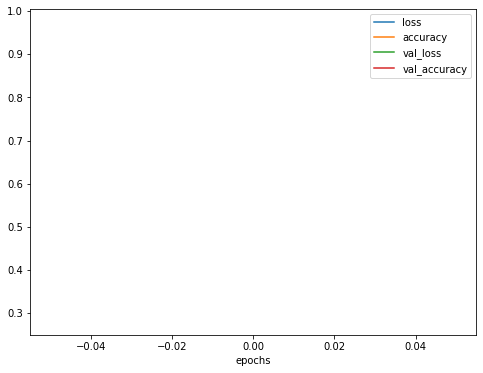

In [ ]:
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
backend.clear_session()
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, y_train, 
                    epochs=1, batch_size=64, validation_split=0.2, callbacks=[callback])
### check the loss trend of epochs
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))

import matplotlib.pyplot as plt
plt.show()

In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Training Loss vs Validation Loss for LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Training Accuracy vs Validation Accuracy for LSTM')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend();

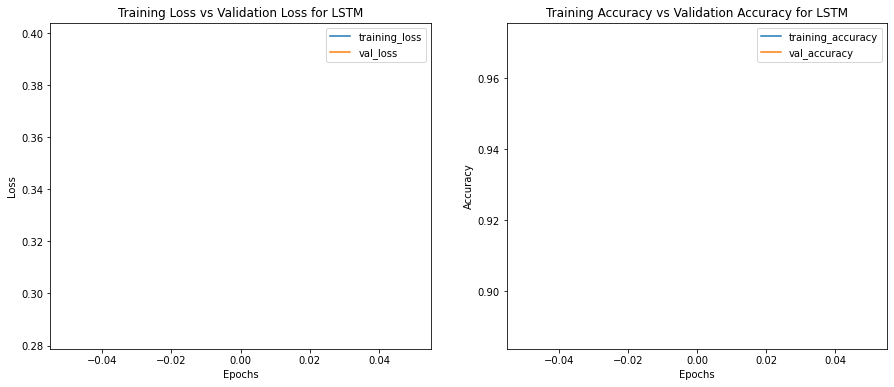

In [ ]:
plot_loss_curves(history)

In [ ]:
model.save("/content/drive/MyDrive/LSTMCYPRUSS.h5")

In [ ]:
# predicting on training set
y_test_pred_prob = model.predict(X_test_lstm)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

14422/14422 [==============================] - 30s 2ms/step


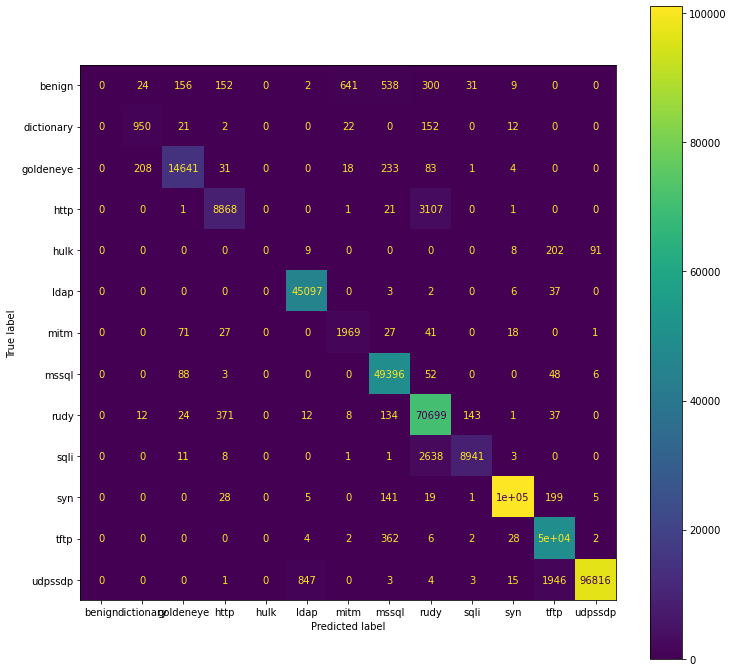

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [ ]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()



In [ ]:
y_train_pred_prob = model.predict(X_train_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

40005/40005 [==============================] - 71s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels))
performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.00      0.00      0.00      5559
  dictionary       0.78      0.81      0.79      3479
   goldeneye       0.97      0.96      0.97     45658
        http       0.93      0.74      0.83     35995
        hulk       0.00      0.00      0.00       932
        ldap       0.98      1.00      0.99    135433
        mitm       0.74      0.91      0.82      6464
       mssql       0.97      1.00      0.98    148780
        rudy       0.92      0.99      0.95    214321
        sqli       0.98      0.77      0.86     34809
         syn       1.00      1.00      1.00    200000
        tftp       0.95      0.99      0.97    149823
     udpssdp       1.00      0.97      0.98    298903

    accuracy                           0.97   1280156
   macro avg       0.79      0.78      0.78   1280156
weighted avg       0.96      0.97      0.97   1280156



<ipython-input-130-8c06ea8cffd7>:8: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)


,accuracy,precision,recall,f1_score
benign,0.9957,0.0,NaN,NaN
dictionary,0.9989,0.814,0.7753,0.7942
goldeneye,0.9977,0.9608,0.9736,0.9672
http,0.9913,0.7405,0.935,0.8265
hulk,0.9993,0.0,NaN,NaN
ldap,0.9978,0.9986,0.9806,0.9895
mitm,0.9979,0.9117,0.7383,0.8159
mssql,0.9962,0.9961,0.972,0.9839
rudy,0.9832,0.9893,0.9171,0.9519
sqli,0.9933,0.7687,0.9814,0.8621


In [ ]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test_true_labels,y_test_pred_labels))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      benign       0.00      0.00      0.00      1853
  dictionary       0.80      0.82      0.81      1159
   goldeneye       0.98      0.96      0.97     15219
        http       0.93      0.74      0.83     11999
        hulk       0.00      0.00      0.00       310
        ldap       0.98      1.00      0.99     45145
        mitm       0.74      0.91      0.82      2154
       mssql       0.97      1.00      0.98     49593
        rudy       0.92      0.99      0.95     71441
        sqli       0.98      0.77      0.86     11603
         syn       1.00      1.00      1.00    101447
        tftp       0.95      0.99      0.97     49941
     udpssdp       1.00      0.97      0.99     99635

    accuracy                           0.97    461499
   macro avg       0.79      0.78      0.78    461499
weighted avg       0.97      0.97      0.97    461499



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

<ipython-input-130-8c06ea8cffd7>:7: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


,accuracy,precision,recall,f1_score
benign,0.996,NaN,0.0,NaN
dictionary,0.999,0.7956,0.8197,0.8075
goldeneye,0.9979,0.9752,0.962,0.9686
http,0.9919,0.9344,0.7391,0.8253
hulk,0.9993,NaN,0.0,NaN
ldap,0.998,0.9809,0.9989,0.9898
mitm,0.9981,0.7397,0.9141,0.8177
mssql,0.9964,0.9712,0.996,0.9835
rudy,0.9845,0.9169,0.9896,0.9519
sqli,0.9938,0.9802,0.7706,0.8628


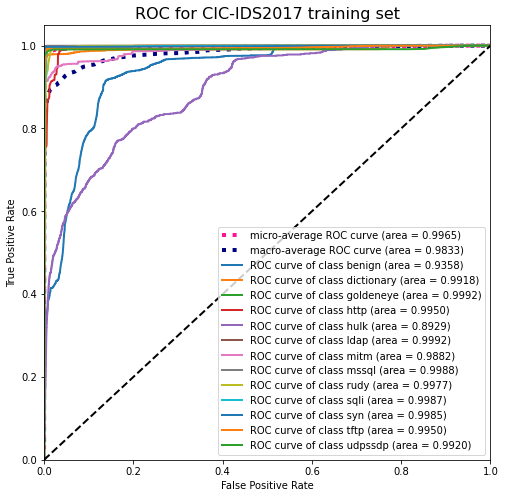

In [ ]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for CIC-IDS2017 training set')

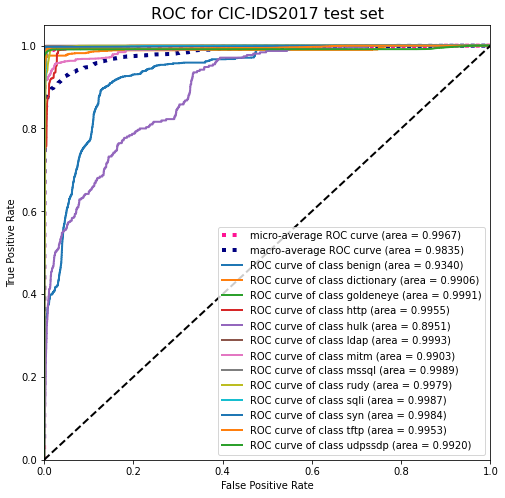

In [ ]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for CIC-IDS2017 test set')